# NGO-FUND RAISING ATTRITION- CLASSIFICATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling

%matplotlib inline
plt.rcParams["patch.force_edgecolor"]=True

## Reading the tables

In [2]:
extrel=pd.read_sas("extrel.sas7bdat")
extrelty=pd.read_sas("extrelty.sas7bdat")
nameaddr=pd.read_sas("nameaddr.sas7bdat")
payhistory=pd.read_sas("payhistory.sas7bdat")
communication=pd.read_sas("communication.sas7bdat")
comclas=pd.read_sas("comclas.sas7bdat")
commaint=pd.read_sas("commaint.sas7bdat")
commediu=pd.read_sas("commediu.sas7bdat")

## Reading the Tables one by one

#### Extrel Table

In [3]:
extrel.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,b'0026414',b'CT',1995-02-02,NaT
1,b'0026419',b'FP',1992-03-01,NaT
2,b'0026424',b'FP',1992-03-01,1996-12-24
3,b'0026430',b'FP',1992-03-01,2006-01-31
4,b'0026430',b'CT',1997-03-07,NaT


As we can see that some of the columns are encoded ,so first we will decode the columns from all the tables

In [4]:
extrel.iloc[:,0]=extrel.iloc[:,0].str.decode('utf-8')
extrel.iloc[:,1]=extrel.iloc[:,1].str.decode('utf-8')

In [5]:
extrel.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,0026414,CT,1995-02-02,NaT
1,0026419,FP,1992-03-01,NaT
2,0026424,FP,1992-03-01,1996-12-24
3,0026430,FP,1992-03-01,2006-01-31
4,0026430,CT,1997-03-07,NaT


#### Extrelty Table

In [6]:
extrelty.head()

,EXRELACTCD,EXRELACTDE
0,b'FP',b'CommitmentDo'
1,b'PS',b'Prospect'
2,b'PF',b'Prosp Fundra'
3,b'PP',b'Prosp Promot'
4,b'GR',b'Grantor'


In [7]:
extrelty.iloc[:,0]=extrelty.iloc[:,0].str.decode('utf-8')
extrelty.iloc[:,1]=extrelty.iloc[:,1].str.decode('utf-8')

In [8]:
extrelty.head()

,EXRELACTCD,EXRELACTDE
0,FP,CommitmentDo
1,PS,Prospect
2,PF,Prosp Fundra
3,PP,Prosp Promot
4,GR,Grantor


#### Nameaddr Table

In [9]:
nameaddr.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,b'0000019',b'HR',b'2500',b'NL'
1,b'0000020',b'HR',b'9550',b'NL'
2,b'0000035',b'HM',b'2150',b'NL'
3,b'0000042',b'FA',b'3012',b'NL'
4,b'0000043',b'MW',b'3000',b'NL'


In [10]:
for col in nameaddr.columns:
    nameaddr[col]=nameaddr[col].str.decode('utf-8')

In [11]:
nameaddr.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,0000019,HR,2500,NL
1,0000020,HR,9550,NL
2,0000035,HM,2150,NL
3,0000042,FA,3012,NL
4,0000043,MW,3000,NL


#### Payhistory Table

In [12]:
payhistory.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,b'0000019',b'X',b'CO'
1,39.0,1993-12-31,41.32,b'0000020',b'X',b'CO'
2,40.0,1993-12-31,13.10,b'0000020',b'X',b'CO'
3,54091.0,1994-01-01,2.02,b'0000020',b'X',b'CO'
4,104480.0,1994-05-19,0.50,b'0000020',b'D',b'OK'


In [13]:
payhistory.iloc[:,3]=payhistory.iloc[:,3].str.decode("utf-8")
payhistory.iloc[:,4]=payhistory.iloc[:,4].str.decode("utf-8")
payhistory.iloc[:,5]=payhistory.iloc[:,5].str.decode("utf-8")

In [14]:
payhistory.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


#### Communication Table

In [15]:
communication.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,b'000405402',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-05-09
1,b'000430904',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-06-14
2,b'000592732',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
3,b'000593375',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
4,b'000618514',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-11-28


In [16]:
for col in range(6):
    communication.iloc[:,col]=communication.iloc[:,col].str.decode('utf-8')

In [17]:
communication.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28


#### Commediu Table

In [18]:
commediu.head()

,MEDIUMCODE,MEDIUMDESC
0,b'FF',b'Face to Face contact'
1,b'FX',b'Fax'
2,b'TX',b'Telex'
3,b'EM',b'Electronic Mail'
4,b'TE',b'Telephone call'


In [19]:
for col in commediu.columns:
    commediu[col]=commediu[col].str.decode('utf-8')

In [20]:
commediu.head()

,MEDIUMCODE,MEDIUMDESC
0,FF,Face to Face contact
1,FX,Fax
2,TX,Telex
3,EM,Electronic Mail
4,TE,Telephone call


#### Commaint Table

In [21]:
commaint.head()

,MNTOPCODE,MNTOPDESC
0,b'CAN',b'Cancellations/replacements'
1,b'DIS',b'Discontinuations'
2,b'MKT',b'Marketing - Enquiries'
3,b'GEN',b'General'
4,b'NEW',b'New relations'


In [22]:
for col in commaint.columns:
    commaint[col]=commaint[col].str.decode('utf-8')

In [23]:
commaint.head()

,MNTOPCODE,MNTOPDESC
0,CAN,Cancellations/replacements
1,DIS,Discontinuations
2,MKT,Marketing - Enquiries
3,GEN,General
4,NEW,New relations


#### Comclas Table

In [24]:
comclas.head()

,CLASCODE,CLASDESC
0,b'CT',b'CTS-item'
1,b'RI',b'Request for information'
2,b'CM',b'Complaint'
3,b'TA',b'Threath / Accusation'
4,b'AK',b'Acknowledgement'


In [25]:
for col in comclas.columns:
    comclas[col]=comclas[col].str.decode('utf-8')

In [26]:
comclas.head()

,CLASCODE,CLASDESC
0,CT,CTS-item
1,RI,Request for information
2,CM,Complaint
3,TA,Threath / Accusation
4,AK,Acknowledgement


## Combining the datasets

#### We can combine these datasets into 3 datasets easily
    - Combine the datasets extrel,extrelty and nameddr on the "EXTRELNO" key
    - Combine the communcation,commediu,commaint and commclas on the "MEDIUMCODE","MMTOPCODE" and "CLASCODE" respectively
    - leave payhistory dataset as a single dataset

In [27]:
# Combine the datasets extrel,extrelty and nameddr on the "EXTRELNO" key
data_ext = pd.merge(extrel,extrelty)
data_ext = pd.merge(data_ext,nameaddr)
data_ext.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,EXRELACTDE,NAME1TITLE,POSTCODE,LANGUACODE
0,0026414,CT,1995-02-02,NaT,Contributor,MW,8300,NL
1,0026430,CT,1997-03-07,NaT,Contributor,HM,2040,NL
2,0026430,FP,1992-03-01,2006-01-31,CommitmentDo,HM,2040,NL
3,0026431,CT,1999-12-01,NaT,Contributor,FA,8520,NL
4,0026431,FP,1992-03-01,NaT,CommitmentDo,FA,8520,NL


In [28]:
# Combine the communcation,commediu,commaint and commclas on the "MEDIUMCODE","MMTOPCODE" and "CLASCODE" respectively

data_comm = pd.merge(communication,commediu)
data_comm = pd.merge(data_comm,commaint)
data_comm = pd.merge(data_comm,comclas)
data_comm.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE,MEDIUMDESC,MNTOPDESC,CLASDESC
0,000767603,LE,TAX,ID,0000020,O,1995-02-24,Letters,Tax forms,Information delivery
1,001370366,LE,TAX,ID,0000020,O,1996-04-05,Letters,Tax forms,Information delivery
2,001371630,LE,TAX,ID,0000020,O,1996-04-05,Letters,Tax forms,Information delivery
3,001703082,LE,TAX,ID,0000020,O,1997-03-04,Letters,Tax forms,Information delivery
4,002071451,LE,TAX,ID,0000020,O,1998-03-20,Letters,Tax forms,Information delivery


In [29]:
payhistory.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


#### We hav now 3 base datasets
    - data_ext
    - data_comm
    - payhistory

## Selecting Active Customers

### A. Define the Time Window
The last date available is 02 February 2007. We will observe the dependent variable for a year.
    - Start of dependent window = 01 January 2006 
    - End of dependent window = 31 December 2006 
    - End of independent window = 03 December 2005

In [30]:
start_DW = pd.Timestamp(2006,1,1)
end_DW = pd.Timestamp(2006,12,31)
end_IW = pd.Timestamp(2005,12,3)
lat_date = pd.Timestamp(2007,2,2) # as ths is the last date available

### B. Subset the extrel dataset according to the appropriate timewindow and only select donors with a commitment.
    - donors have to be active during the independent period. Given,
        - Exrelactcd – Activity code of the donor (FP means active) 
        - Extrelstdt – Start date of the relationship
        - Exreldaten – End date of the relationship (Missing: not ended)
    - So, we define an active customer as one with - 
        - activity code = FP,
        - start date before end of IW 
        - end date after start of DW [means he was active during IW] or missing [means still a donor],
                i.e. end date should not be before(i.e. less than) start of DW

In [31]:
donors_active = data_ext[(data_ext['EXRELACTCD']=='FP') & (data_ext['EXTRELSTDT']<end_IW) & (~(data_ext['EXRELDATEN']<start_DW))]

In [32]:
donors_active.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,EXRELACTDE,NAME1TITLE,POSTCODE,LANGUACODE
2,0026430,FP,1992-03-01,2006-01-31,CommitmentDo,HM,2040,NL
4,0026431,FP,1992-03-01,NaT,CommitmentDo,FA,8520,NL
6,0026447,FP,1992-03-01,NaT,CommitmentDo,HM,2860,NL
8,0026470,FP,1992-03-01,NaT,CommitmentDo,HR,2600,NL
10,0026472,FP,1992-03-01,NaT,CommitmentDo,HM,3461,NL


### C. Create Independent PREDICTOR Variables
    a. Frequency (payment,communication)
    b. Recency (payment,communication)
    c. Total and average donation per donor
    d. Creating Dummy Variables
        - Pay type per customer
        - Dummy whether the donor made a complaint
        - Dummy whether communication direction was ever incoming

#### a,b. Frequency and Recency
    - frequency of the purchase or payment
    - frequency of comunication
    
    - recency of purchase
    - recency of communication

In [33]:
freq_rec_pay = payhistory.groupby('EXTRELNO').agg({'PDATE': lambda x: (lat_date - x.max()).days,
                                        'PID': lambda x: len(x)})

In [34]:
freq_rec_pay.rename(columns={'PDATE':'Recency_pay','PID':'Frequency_pay'},inplace=True)

In [35]:
freq_rec_pay.head()

,Recency_pay,Frequency_pay
EXTRELNO,,
0000019,4781,1.0
0000020,16,158.0
0000035,16,155.0
0000042,2201,85.0
0000043,1299,229.0


In [36]:
freq_rec_com = data_comm.groupby('EXTRELNO').agg({'CONTDATE': lambda x: (lat_date - x.max()).days,
                                                  'CONTID': lambda x: len(x)})

In [37]:
freq_rec_com.rename(columns={'CONTDATE':'Recency_comm','CONTID':'Frequency_comm'},inplace=True)

In [38]:
freq_rec_com.head()

,Recency_comm,Frequency_comm
EXTRELNO,,
0000020,330,19
0000035,197,23
0000042,2136,12
0000043,1106,28
0000060,2547,14


#### c. Total and Average Donation per year

In [39]:
avg_table= payhistory.groupby('EXTRELNO')['PAMT'].agg(['sum','mean'])
avg_table.rename(columns={'sum': 'Pay_Total','mean': 'Pay_Average'}, inplace=True)

In [40]:
avg_table.head()

,Pay_Total,Pay_Average
EXTRELNO,,
0000019,9.57,9.570000
0000020,3176.97,20.107405
0000035,3168.40,20.441290
0000042,1543.03,18.153294
0000043,4373.24,19.097118


#### d.Creating Dummy Variables
> ##### Pay Type per customer

In [41]:
temp=payhistory
temp.index=payhistory.EXTRELNO
temp=temp['PAYTYPECD'].to_frame()

In [42]:
paytypes=pd.get_dummies(data=temp['PAYTYPECD'],prefix='Paytype')
pay_type=paytypes.groupby('EXTRELNO').sum()
pay_type.head()

,Paytype_D,Paytype_E,Paytype_O,Paytype_X
EXTRELNO,,,,
0000019,0.0,0.0,0.0,1.0
0000020,153.0,0.0,0.0,3.0
0000035,153.0,0.0,0.0,2.0
0000042,82.0,0.0,0.0,3.0
0000043,221.0,0.0,0.0,5.0


In [43]:
data_comm['CLASDESC'].value_counts()

Information delivery       202886
Answer                      37958
Request for information     23780
Acknowledgement             18308
CTS-item                    12437
Reminder                     8558
Complaint                    2304
Name: CLASDESC, dtype: int64

> ##### Communication Class Code is complaint or not

- finding the clascode for the "Complaint"

In [44]:
data_comm['CLASCODE'][data_comm['CLASDESC']=='Complaint'].head()

264624    CM
264625    CM
264626    CM
264627    CM
264628    CM
Name: CLASCODE, dtype: object

    So, its clear that CLASCODE for 'Complaint' is 'CM'

In [45]:
temp2 = data_comm
temp2.index = temp2['EXTRELNO']

In [46]:
dummy_complaint = pd.get_dummies(data=temp2['CLASCODE'],prefix='CLASCODE')
dummy_complaint = dummy_complaint.groupby('EXTRELNO').sum()
dummy_complaint.head()
#Only ClasCode_CM is needed

,CLASCODE_AK,CLASCODE_AN,CLASCODE_CM,CLASCODE_CT,CLASCODE_ID,CLASCODE_RI,CLASCODE_RM
EXTRELNO,,,,,,,
0000020,0,1,0,0,18,0,0
0000035,1,1,0,1,20,0,0
0000042,0,1,0,0,9,1,1
0000043,1,7,0,0,18,2,0
0000060,0,3,0,0,10,1,0


> #### Dummy whether communication direction was ever incoming

In [47]:
temp3 = data_comm
temp3.index = temp3['EXTRELNO']

In [48]:
dummy_cont_inc=pd.get_dummies(temp3['CONTDIREC'],prefix='Contdirec')
dummy_cont_inc=dummy_cont_inc.groupby('EXTRELNO').sum()
dummy_cont_inc.head()

## Only Contdirec_I is needed

,Contdirec_I,Contdirec_O
EXTRELNO,,
0000020,0,19
0000035,2,21
0000042,1,11
0000043,4,24
0000060,2,12


#### Combining these derived variables

In [49]:
data_comm.index=data_comm['EXTRELNO']

In [50]:
basetable = pd.DataFrame()
basetable = freq_rec_pay.join(freq_rec_com)
basetable = basetable.join(avg_table)
basetable = basetable.join(data_comm)
basetable = basetable.join(pay_type)
basetable = basetable.join(dummy_complaint['CLASCODE_CM'])
basetable = basetable.join(dummy_cont_inc['Contdirec_I'])

In [51]:
basetable.isnull().sum()

Recency_pay          0
Frequency_pay        0
Recency_comm      1000
Frequency_comm    1000
Pay_Total            0
Pay_Average          0
CONTID            1000
MEDIUMCODE        1000
MNTOPCODE         1000
CLASCODE          1000
EXTRELNO          1000
CONTDIREC         1000
CONTDATE          1000
MEDIUMDESC        1000
MNTOPDESC         1000
CLASDESC          1000
Paytype_D            0
Paytype_E            0
Paytype_O            0
Paytype_X            0
CLASCODE_CM       1000
Contdirec_I       1000
dtype: int64

### D. Creating Dependent PREDICTED (Churn) Variables
    - If the relationship ending date (exreldaten) is non-missing and lies within the DW, it means that account has churned.
    - set such donors to  churn=1

In [52]:
warnings.filterwarnings('ignore')
donors_active['Churn'] =np.where(donors_active['EXRELDATEN'].isnull(), 0, 1)
donors_active.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,EXRELACTDE,NAME1TITLE,POSTCODE,LANGUACODE,Churn
2,0026430,FP,1992-03-01,2006-01-31,CommitmentDo,HM,2040,NL,1
4,0026431,FP,1992-03-01,NaT,CommitmentDo,FA,8520,NL,0
6,0026447,FP,1992-03-01,NaT,CommitmentDo,HM,2860,NL,0
8,0026470,FP,1992-03-01,NaT,CommitmentDo,HR,2600,NL,0
10,0026472,FP,1992-03-01,NaT,CommitmentDo,HM,3461,NL,0


- variable creation to divide the datasets into 3 different datasets on basis of years in ratio(3:1:1)
    - for Training
    - for Validation
    - for Testing

In [53]:
warnings.filterwarnings('ignore')

result=map(lambda x: x.year, donors_active['EXTRELSTDT'])
donors_active['Start_Year']=list(result)
donors_active.head()


,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,EXRELACTDE,NAME1TITLE,POSTCODE,LANGUACODE,Churn,Start_Year
2,0026430,FP,1992-03-01,2006-01-31,CommitmentDo,HM,2040,NL,1,1992
4,0026431,FP,1992-03-01,NaT,CommitmentDo,FA,8520,NL,0,1992
6,0026447,FP,1992-03-01,NaT,CommitmentDo,HM,2860,NL,0,1992
8,0026470,FP,1992-03-01,NaT,CommitmentDo,HR,2600,NL,0,1992
10,0026472,FP,1992-03-01,NaT,CommitmentDo,HM,3461,NL,0,1992


#### Histogram to visualise the list of the Customers according to their starting year

1995    874
1993    812
2000    783
1994    747
2005    529
1999    523
2004    520
1992    436
2002    391
2001    362
1996    346
2003    304
1997    283
1998    271
Name: Start_Year, dtype: int64


Text(0.5,1,'Histogram of active customers')

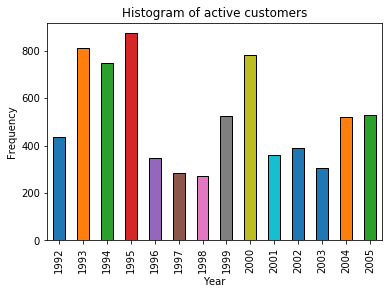

In [54]:
count=donors_active['Start_Year'].value_counts()
print(count)
axes=count.sort_index().plot.bar()
axes.set_xlabel('Year')
axes.set_ylabel('Frequency')
axes.set_title('Histogram of active customers')

###### Here we can see that the 
    - year 1995 had most of active customers
    - while year 1998 has least customers

### E. Merging all the data together to get the imporatnt features from data
    In beginning there were & datasets, which were combined to form 3 datasets (data_ext , data_comm , payhistory)
    
    Since the data_comm and payhistory were used to derive important features into basetable dataset,
    and data_ext was used to derve the active customers in active_donors dataset
    
    Now only basetable and active_donors datasets needs to be merged

In [55]:
warnings.filterwarnings('ignore')

basetable.drop(columns={'EXTRELNO'},axis=1)
basetable = pd.merge(basetable,donors_active)

In [56]:
basetable.isnull().sum()

Recency_pay            0
Frequency_pay          0
Recency_comm           0
Frequency_comm         0
Pay_Total              0
Pay_Average            0
CONTID                 0
MEDIUMCODE             0
MNTOPCODE              0
CLASCODE               0
EXTRELNO               0
CONTDIREC              0
CONTDATE               0
MEDIUMDESC             0
MNTOPDESC              0
CLASDESC               0
Paytype_D              0
Paytype_E              0
Paytype_O              0
Paytype_X              0
CLASCODE_CM            0
Contdirec_I            0
EXRELACTCD             0
EXTRELSTDT             0
EXRELDATEN        134619
EXRELACTDE             0
NAME1TITLE          3079
POSTCODE             102
LANGUACODE             0
Churn                  0
Start_Year             0
dtype: int64

#### A line plot to visualize the yearwise % of churn

In [57]:
churn_percent=basetable.pivot_table(index='Start_Year', values='Churn', aggfunc='mean')
churn_percent

,Churn
Start_Year,
1992,0.051176
1993,0.064613
1994,0.052097
1995,0.062524
1996,0.090827
1997,0.069548
1998,0.087817
1999,0.092391
2000,0.090119


Text(0.5,1,'Churn Plot')

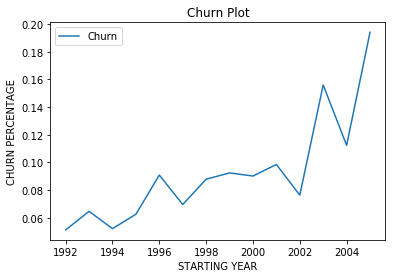

In [58]:
axes=churn_percent.plot()
axes.set_xlabel('STARTING YEAR')
axes.set_ylabel('CHURN PERCENTAGE')
axes.set_title('Churn Plot')

## Basetable dataset is now the only dataset that is required for data modelling 

### Exploring the dataset

In [59]:
basetable.dtypes

Recency_pay                int64
Frequency_pay            float64
Recency_comm             float64
Frequency_comm           float64
Pay_Total                float64
Pay_Average              float64
CONTID                    object
MEDIUMCODE                object
MNTOPCODE                 object
CLASCODE                  object
EXTRELNO                  object
CONTDIREC                 object
CONTDATE          datetime64[ns]
MEDIUMDESC                object
MNTOPDESC                 object
CLASDESC                  object
Paytype_D                float64
Paytype_E                float64
Paytype_O                float64
Paytype_X                float64
CLASCODE_CM              float64
Contdirec_I              float64
EXRELACTCD                object
EXTRELSTDT        datetime64[ns]
EXRELDATEN        datetime64[ns]
EXRELACTDE                object
NAME1TITLE                object
POSTCODE                  object
LANGUACODE                object
Churn                      int32
Start_Year

In [60]:
numeric_var=[key for key in dict(basetable.dtypes) if dict(basetable.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var=[key for key in dict(basetable.dtypes) if dict(basetable.dtypes)[key] in ['object']]

basetable_num=basetable[numeric_var]
basetable_cat=basetable[cat_var]

In [61]:
# Creating Data audit Report
# Use a general function that returns multiple values    
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [62]:
basetable.columns

Index(['Recency_pay', 'Frequency_pay', 'Recency_comm', 'Frequency_comm',
       'Pay_Total', 'Pay_Average', 'CONTID', 'MEDIUMCODE', 'MNTOPCODE',
       'CLASCODE', 'EXTRELNO', 'CONTDIREC', 'CONTDATE', 'MEDIUMDESC',
       'MNTOPDESC', 'CLASDESC', 'Paytype_D', 'Paytype_E', 'Paytype_O',
       'Paytype_X', 'CLASCODE_CM', 'Contdirec_I', 'EXRELACTCD', 'EXTRELSTDT',
       'EXRELDATEN', 'EXRELACTDE', 'NAME1TITLE', 'POSTCODE', 'LANGUACODE',
       'Churn', 'Start_Year'],
      dtype='object')

- Drop the columns the are not required or have been used to crate new festures

In [63]:
drop_col = ['MEDIUMCODE','MNTOPCODE','CLASCODE','CONTDIREC','CONTDATE','MEDIUMDESC','MNTOPDESC',
            'CLASDESC','EXRELACTCD','EXTRELSTDT','EXRELDATEN','EXRELACTDE','NAME1TITLE',
           'POSTCODE','CONTID']

In [64]:
basetable.drop(columns=drop_col,axis=1,inplace=True)

In [65]:
basetable.columns

Index(['Recency_pay', 'Frequency_pay', 'Recency_comm', 'Frequency_comm',
       'Pay_Total', 'Pay_Average', 'EXTRELNO', 'Paytype_D', 'Paytype_E',
       'Paytype_O', 'Paytype_X', 'CLASCODE_CM', 'Contdirec_I', 'LANGUACODE',
       'Churn', 'Start_Year'],
      dtype='object')

In [66]:
from sklearn.preprocessing import LabelEncoder
basetable['LANGUACODE'] = LabelEncoder().fit_transform(basetable['LANGUACODE'])

In [67]:
numeric_var=[key for key in dict(basetable.dtypes) if dict(basetable.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var=[key for key in dict(basetable.dtypes) if dict(basetable.dtypes)[key] in ['object']]

basetable_num=basetable[numeric_var]
basetable_cat=basetable[cat_var]

In [68]:
num_summary=basetable_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Recency_pay,145966.0,0.0,1.040235e+07,71.265555,16.000000,133.811673,1.790556e+04,9.0,16.000000,16.000000,16.000000,16.000000,16.000000,56.000000,203.000000,340.000000,564.00,4781.00
Frequency_pay,145966.0,0.0,1.432543e+07,98.142266,91.000000,70.560474,4.978781e+03,1.0,7.000000,15.000000,22.000000,48.000000,91.000000,146.000000,156.000000,158.000000,296.00,1510.00
Recency_comm,145966.0,0.0,4.012504e+07,274.893057,330.000000,112.245221,1.259899e+04,8.0,15.000000,44.000000,74.000000,248.000000,330.000000,330.000000,330.000000,330.000000,330.00,1386.00
Frequency_comm,145966.0,0.0,3.617924e+06,24.786073,23.000000,11.126232,1.237930e+02,2.0,5.000000,10.000000,15.000000,20.000000,23.000000,28.000000,34.000000,41.000000,72.00,127.00
Pay_Total,145966.0,0.0,3.847711e+08,2636.032293,2873.070000,1370.567558,1.878455e+06,-875.0,480.000000,912.000000,1368.650000,1874.230000,2873.070000,3096.700000,3130.110000,3367.570000,6253.32,30860.49
Pay_Average,145966.0,0.0,6.407860e+06,43.899678,21.973234,48.278192,2.330784e+03,-80.5,16.494151,19.453885,19.915128,20.768243,21.973234,47.252923,108.147143,159.745789,259.97,600.00
Paytype_D,145966.0,0.0,9.994479e+06,68.471281,51.000000,72.546737,5.263029e+03,0.0,0.000000,0.000000,0.000000,0.000000,51.000000,135.000000,153.000000,153.000000,241.00,1472.00
Paytype_E,145966.0,0.0,6.602060e+05,4.523012,0.000000,8.920218,7.957030e+01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,20.000000,20.000000,38.00,122.00
Paytype_O,145966.0,0.0,3.405501e+06,23.330783,1.000000,48.462319,2.348596e+03,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,23.000000,97.000000,127.000000,180.00,829.00
Paytype_X,145966.0,0.0,8.502000e+04,0.582464,0.000000,1.248351,1.558380e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,4.00,28.00


In [69]:
basetable.dtypes

Recency_pay         int64
Frequency_pay     float64
Recency_comm      float64
Frequency_comm    float64
Pay_Total         float64
Pay_Average       float64
EXTRELNO           object
Paytype_D         float64
Paytype_E         float64
Paytype_O         float64
Paytype_X         float64
CLASCODE_CM       float64
Contdirec_I       float64
LANGUACODE          int64
Churn               int32
Start_Year          int64
dtype: object

### Correlation

In [70]:
basetable.corr()

,Recency_pay,Frequency_pay,Recency_comm,Frequency_comm,Pay_Total,Pay_Average,Paytype_D,Paytype_E,Paytype_O,Paytype_X,CLASCODE_CM,Contdirec_I,LANGUACODE,Churn,Start_Year
Recency_pay,1.000000,-0.268210,0.100496,0.068713,-0.062011,0.390141,-0.243459,-0.083568,-0.017065,0.018040,0.009595,0.066016,-0.009058,0.508677,0.047461
Frequency_pay,-0.268210,1.000000,-0.055158,0.330311,0.696757,-0.490937,0.692844,0.196192,0.365005,0.410360,0.131421,0.116713,0.060388,-0.050168,-0.441145
Recency_comm,0.100496,-0.055158,1.000000,-0.196056,-0.041643,0.034193,-0.030251,-0.033075,-0.030058,0.005612,-0.019065,-0.181796,0.031397,-0.206757,-0.059427
Frequency_comm,0.068713,0.330311,-0.196056,1.000000,0.479504,-0.014840,0.120814,0.098373,0.263521,0.240805,0.321246,0.765672,0.061584,0.088135,-0.372494
Pay_Total,-0.062011,0.696757,-0.041643,0.479504,1.000000,0.035966,0.474783,0.051879,0.263331,0.542831,0.173214,0.149395,0.093081,-0.085489,-0.553380
Pay_Average,0.390141,-0.490937,0.034193,-0.014840,0.035966,1.000000,-0.359048,-0.182938,-0.149708,0.004339,0.004649,-0.023979,0.023156,-0.020240,0.014030
Paytype_D,-0.243459,0.692844,-0.030251,0.120814,0.474783,-0.359048,1.000000,-0.425495,-0.406600,0.280910,0.037167,-0.025919,0.088032,-0.047028,-0.318780
Paytype_E,-0.083568,0.196192,-0.033075,0.098373,0.051879,-0.182938,-0.425495,1.000000,0.702104,-0.001383,0.040084,0.136433,-0.090476,-0.042600,0.032398
Paytype_O,-0.017065,0.365005,-0.030058,0.263521,0.263331,-0.149708,-0.406600,0.702104,1.000000,0.133178,0.123427,0.176405,-0.030977,0.007977,-0.142394
Paytype_X,0.018040,0.410360,0.005612,0.240805,0.542831,0.004339,0.280910,-0.001383,0.133178,1.000000,0.073856,0.043342,0.097087,-0.026342,-0.478942


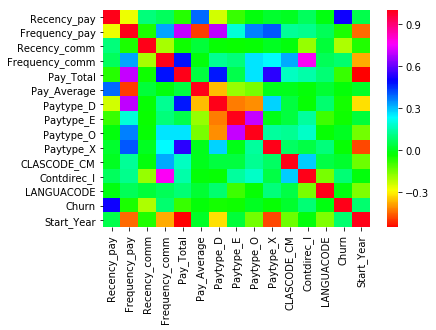

In [71]:
sns.heatmap(basetable.corr(),cmap='hsv')

### Checking for missing Values

In [72]:
basetable.isnull().sum()

Recency_pay       0
Frequency_pay     0
Recency_comm      0
Frequency_comm    0
Pay_Total         0
Pay_Average       0
EXTRELNO          0
Paytype_D         0
Paytype_E         0
Paytype_O         0
Paytype_X         0
CLASCODE_CM       0
Contdirec_I       0
LANGUACODE        0
Churn             0
Start_Year        0
dtype: int64

#### No missing values are left

### Check for duplicates 

In [73]:
basetable.duplicated(subset='EXTRELNO').sum()

138802

In [74]:
### Drop these Duplicates
basetable.drop_duplicates(subset='EXTRELNO',inplace=True)

In [75]:
basetable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7164 entries, 0 to 145962
Data columns (total 16 columns):
Recency_pay       7164 non-null int64
Frequency_pay     7164 non-null float64
Recency_comm      7164 non-null float64
Frequency_comm    7164 non-null float64
Pay_Total         7164 non-null float64
Pay_Average       7164 non-null float64
EXTRELNO          7164 non-null object
Paytype_D         7164 non-null float64
Paytype_E         7164 non-null float64
Paytype_O         7164 non-null float64
Paytype_X         7164 non-null float64
CLASCODE_CM       7164 non-null float64
Contdirec_I       7164 non-null float64
LANGUACODE        7164 non-null int64
Churn             7164 non-null int32
Start_Year        7164 non-null int64
dtypes: float64(11), int32(1), int64(3), object(1)
memory usage: 923.5+ KB


In [76]:
basetable.index = range(len(basetable['EXTRELNO']))

In [77]:
## Categorical Variable
hrdf=basetable
left = 'Churn'
num_list =numeric_var
cat_variable = cat_var
chisq_df = pd.DataFrame()
for cat_variable in cat_var:
    cross_tab = pd.crosstab(hrdf[cat_variable],hrdf[left], margins=False)
    stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([cat_variable,stats.chi2_contingency(observed=cross_tab)[0],stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
print(chisq_df, '\n')

## Numerical Variable
tstats_df = pd.DataFrame()
for num_variable in num_list:
    tstats = stats.ttest_ind(hrdf[hrdf[left]==1][num_variable],hrdf[hrdf[left]==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

   Variable ChiSquare   P-Value
0  EXTRELNO      7164  0.494445 

     Variable Name T-Statistic      P-Value
0      Recency_pay     42.7199            0
1    Frequency_pay    -4.18649  2.86698e-05
2     Recency_comm    -18.0751  1.90334e-71
3   Frequency_comm     6.32106  2.75355e-10
4        Pay_Total    -7.04638  2.00746e-12
5      Pay_Average    -1.69595    0.0899393
6        Paytype_D    -3.34236  0.000834957
7        Paytype_E    -4.32243  1.56408e-05
8        Paytype_O  0.00618448     0.995066
9        Paytype_X    -2.06501    0.0389578
10     CLASCODE_CM      0.9396     0.347455
11     Contdirec_I     8.29554     1.28e-16
12      LANGUACODE   -0.526331     0.598674
13           Churn         inf            0
14      Start_Year      4.6072  4.15194e-06


In [78]:
pandas_profiling.ProfileReport(basetable)

Number of variables,16
Number of observations,7164
Total Missing (%),0.0%
Total size in memory,867.6 KiB
Average record size in memory,124.0 B
Numeric,13
Categorical,0
Boolean,2
Date,0
Text (Unique),1
Rejected,0


# Model Building 

## Various Classification Models:-
> Logistic Regression <br>
 KNN(K-Nearest Classifier) <br>
 Decision Tree classifier <br>
 Naive Bayes <br>
 Random Forest Classifier <br>
 SVC

In [79]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [80]:
# for validation
from sklearn.model_selection import cross_validate,cross_val_score

In [81]:
# for calculating model accuracy 
from sklearn.metrics import accuracy_score, confusion_matrix

    - Divide your data into different time windows.
        For example: If you have data for 5 years,
        - Use the first 3 years to train models
        - validate on the 4th year and pick your best model
        - The 5th year’s data will be your hold-out sample for determining out-of-sample accuracy

In [82]:
start = basetable.Start_Year.min()
end = basetable.Start_Year.max()
year_range = end - start
print("Start year" ,start)
print("End year ",end)
print('diff ',year_range)

Start year 1992
End year  2005
diff  13


    -So, we divide data in 3 sets:
>Training : Year(1992 - 2000) 9 Years
 <br>Validation : Year(2001 - 2003) 2 Years
<br>Testing : Year(2003 - 2005) 2 Years

In [83]:
train=basetable[basetable.Start_Year<2001]
validation=basetable[(basetable.Start_Year>=2001) & (basetable.Start_Year<2003)]
test=basetable[basetable.Start_Year>=2003]

X_train = train.drop(['Churn'], axis=1)
Y_train = train.Churn

X_validate = validation.drop(['Churn'], axis=1)
Y_validate = validation.Churn

X_test = test.drop(['Churn'], axis=1)
Y_test = test.Churn

### Feature Scaling
    - to get all the data on same scale

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc = StandardScaler()

In [86]:
X_train = sc.fit_transform(X_train)
X_validate = sc.transform(X_validate)
X_test = sc.transform(X_test)

In [87]:
# Keep random_state for all models =0
rs = 0

In [88]:
models = []
models.append(('LR',LogisticRegression(random_state=rs)))
models.append(('SVC',SVC(random_state=rs)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier(random_state=rs)))
models.append(('RFC',RandomForestClassifier(random_state=rs)))
models.append(('Naive',GaussianNB()))

In [89]:
classifier_name = []
train_score = []
validate_score = []
test_score = []
for name,clf in models:
    classifier_name.append(name)
    clf_train = clf.fit(X_train,Y_train)
    train_score.append(accuracy_score(clf_train.predict(X_train),Y_train))
    validate_score.append(accuracy_score(clf_train.predict(X_validate),Y_validate))
    test_score.append(accuracy_score(clf_train.predict(X_test),Y_test))

In [90]:
summary = pd.DataFrame()
summary['Model']=classifier_name
summary['Train_score']=train_score
summary['Validate_score']=validate_score
summary['Test_score']=test_score

In [91]:
summary.sort_values(by=['Test_score','Train_score'],ascending=False,inplace=True)

In [92]:
summary

,Model,Train_score,Validate_score,Test_score
2,KNN,0.976345,0.969415,0.953697
0,LR,0.955845,0.948138,0.945482
4,RFC,0.998029,0.953457,0.929052
1,SVC,0.979894,0.970745,0.928305
5,Naive,0.934753,0.930851,0.921583
3,DTC,1.000000,0.936170,0.910381


### Since, KNN has highest score
    - we will use the knn to build the model

## KNN Classifier

In [93]:
classifier = KNeighborsClassifier()

In [94]:
classifier.fit(X_train,Y_train)
y_valid=classifier.predict(X_validate)
y_pred=classifier.predict(X_test)

In [95]:
y_prob = classifier.predict_proba(X_test)

In [96]:
y_prob=pd.DataFrame(y_prob)
y_prob_1=list(y_prob[1])

In [97]:
cm = confusion_matrix(Y_test, y_pred)

In [98]:
cm

array([[1211,    6],
       [  56,   66]], dtype=int64)

In [99]:
result = pd.DataFrame()

In [100]:
result['actual']=Y_test
result['pred']=y_pred
result['Prob_predict_1']=y_prob_1

In [101]:
result.head()

,actual,pred,Prob_predict_1
76,0,0,0.0
375,0,0,0.0
487,1,1,0.8
712,0,0,0.2
829,1,0,0.0


Text(67.8611,0.5,'Äctual Values')

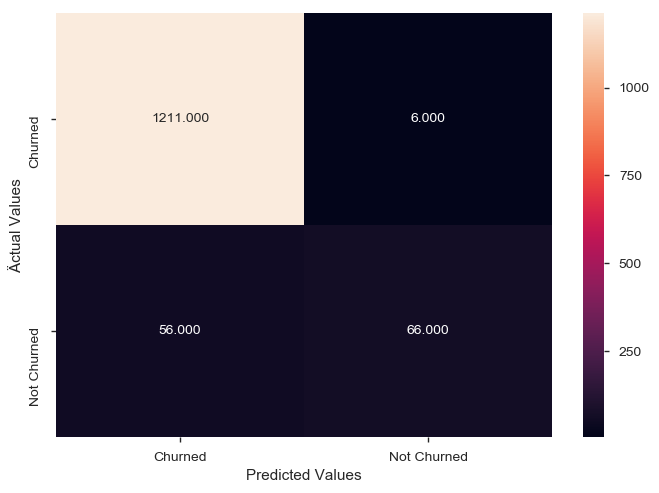

In [102]:
sns.heatmap(cm,annot=True,fmt='.3f',xticklabels=["Churned","Not Churned"], yticklabels=["Churned","Not Churned"])
plt.xlabel("Predicted Values")
plt.ylabel("Äctual Values")

In [103]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1217
          1       0.92      0.54      0.68       122

avg / total       0.95      0.95      0.95      1339



In [104]:
accuracy_score(Y_test,y_pred)

0.9536967886482449

In [105]:
from sklearn.metrics import roc_auc_score

In [106]:
auc_score = roc_auc_score(result.actual,result.Prob_predict_1)
auc_score

0.868263130245026

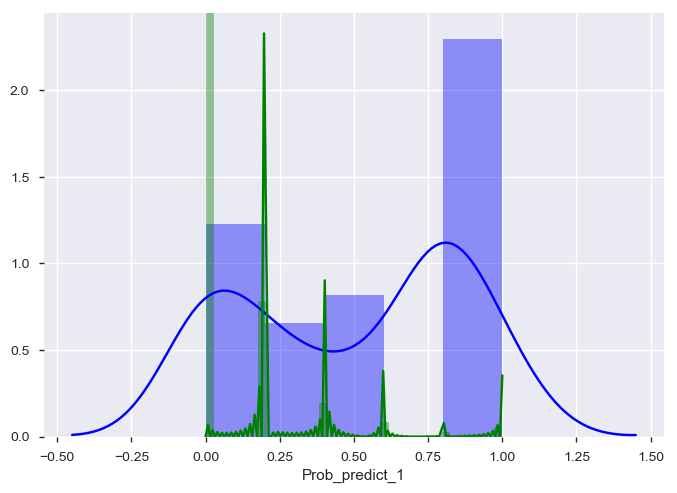

In [111]:
sns.distplot(result[result.actual==1]["Prob_predict_1"],color ='b')
sns.distplot(result[result.actual==0]["Prob_predict_1"],color ='g')

In [109]:
from sklearn.metrics import roc_curve

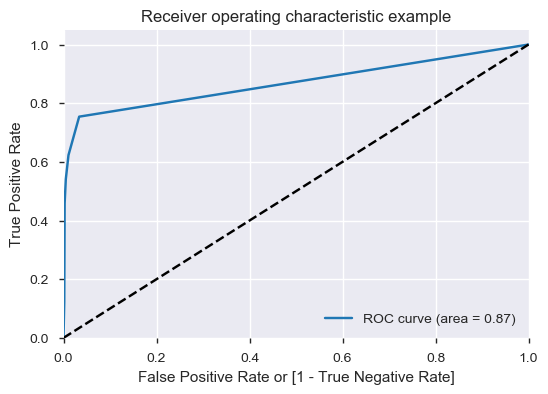

In [110]:
fpr, tpr, thresholds = roc_curve(result.actual,
                                     result.Prob_predict_1,
                                         drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()